# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## 1. Carga de datos

Cargá el archivo con los datos del problema.


In [ ]:
# PATH = "Completar"
PATH = "Student_Performance.csv"

df = pd.read_csv(PATH)

print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82        

## 2. Análisis exploratorio

Estudiá la estructura del dataset: tipos de variables, valores faltantes y estadísticos descriptivos.

Sugerencias: busca funciones como info y describe de pandas

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## 3. Visualización

Graficá las relaciones entre la variable dependiente y cada una de las explicativas.


In [ ]:
# Reemplazá estos nombres por los nombres reales de las columnas
columnas = ["x1", "x2", "x3"]
target = "y"

for col in columnas:
    plt.scatter(df[col], df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{target} vs {col}")
    plt.grid(True)
    plt.show()


## 4. Implementación de la regresión lineal múltiple (desde cero)

Recordá que el modelo tiene la forma:

\\[
\\hat{y} = X \\beta
\\]

donde:

- \\(X\\) es la matriz de diseño (con columna de 1s al principio)
- \\(\\beta\\) son los coeficientes
- \\(\\hat{y}\\) es la predicción


In [ ]:
# Construcción de la matriz X y el vector y
X_raw = df[columnas].values  # Matriz de variables independientes
n = X_raw.shape[0]
X = np.hstack([np.ones((n, 1)), X_raw])  # Agregamos columna de 1s para el término independiente

y = df[target].values.reshape(-1, 1)


### 4.1 Cálculo de los coeficientes utilizando la fórmula cerrada:

\\[
\\beta = (X^T X)^{-1} X^T y
\\]


In [ ]:
# Implementación manual
Xt = X.T
XtX = Xt @ X
XtX_inv = np.linalg.inv(XtX)
Xty = Xt @ y

beta = XtX_inv @ Xty  # Coeficientes estimados
beta.flatten()

## 5. Predicción y evaluación del modelo


In [ ]:
# Predicción
y_pred = X @ beta

# Cálculo del error cuadrático medio (MSE) y R^2
mse = np.mean((y - y_pred) ** 2)
sst = np.sum((y - np.mean(y)) ** 2)
ssr = np.sum((y - y_pred) ** 2)
r2 = 1 - (ssr / sst)

print("MSE:", mse)
print("R^2:", r2)


## 6. Visualización del ajuste



In [ ]:
plt.plot(y, label="Real", marker='o')
plt.plot(y_pred, label="Predicción", marker='x')
plt.title("Real vs Predicción")
plt.xlabel("Observación")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


### Dataset cleaning

In [ ]:
# Cargar los datos
df = pd.read_csv("Student_Performance.csv")

# Variables predictoras (convertimos también los valores categóricos a numéricos)
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Sample Question Papers Practiced'] = pd.to_numeric(df['Sample Question Papers Practiced'], errors='coerce')

# Eliminamos filas con valores faltantes si hay
df = df.dropna()



## 7. Conclusiones

Comentá los resultados obtenidos: ¿cómo se comporta el modelo?, ¿los errores son bajos?, ¿qué variables parecen más relevantes?


Cosas sueltas

Pendiente (m): 2.77306282463894
Intercepto (b): 41.37917462286023
Error cuadrático medio: 317.5336833078034


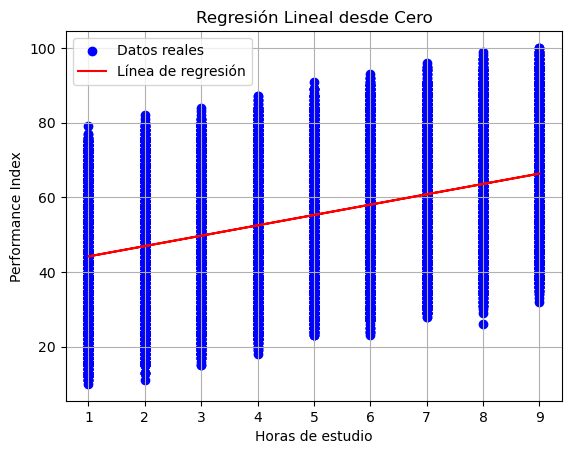

In [11]:


# Elegir las variables
x = df["Hours Studied"].values
y = df["Performance Index"].values

# Número de datos
n = len(x)

# Calcular m (pendiente)
numerador = n * np.sum(x * y) - np.sum(x) * np.sum(y)
denominador = n * np.sum(x ** 2) - (np.sum(x)) ** 2
m = numerador / denominador

# Calcular b (intercepto)
b = (np.sum(y) - m * np.sum(x)) / n

print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")

# Predecir los valores de y
y_pred = m * x + b

# Evaluar el modelo con Error Cuadrático Medio (MSE)
mse = np.mean((y - y_pred) ** 2)
print(f"Error cuadrático medio: {mse}")

# Opcional: graficar (si querés)
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label="Datos reales")
plt.plot(x, y_pred, color='red', label="Línea de regresión")
plt.xlabel("Horas de estudio")
plt.ylabel("Performance Index")
plt.legend()
plt.title("Regresión Lineal desde Cero")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Cargar los datos
df = pd.read_csv("Student_Performance.csv")

# Variables predictoras (convertimos también los valores categóricos a numéricos)
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Sample Question Papers Practiced'] = pd.to_numeric(df['Sample Question Papers Practiced'], errors='coerce')

# Eliminamos filas con valores faltantes si hay
df = df.dropna()

# Matriz X de variables independientes
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
        'Sleep Hours', 'Sample Question Papers Practiced']].values

# Agregamos columna de unos para el término independiente (bias)
X = np.c_[np.ones(X.shape[0]), X]

# Vector y (target)
y = df['Performance Index'].values.reshape(-1, 1)

# Cálculo de los coeficientes usando la fórmula de mínimos cuadrados
# β = (X^T X)^-1 X^T y
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("Coeficientes (incluye intercepto primero):")
print(beta.flatten())

# Predicciones
y_pred = X.dot(beta)

# Evaluación del modelo: error cuadrático medio
mse = np.mean((y - y_pred) ** 2)
print(f"Error cuadrático medio: {mse:.2f}")


### Regresion polinomica multivariada

In [ ]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv("Student_Performance.csv")
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Sample Question Papers Practiced'] = pd.to_numeric(df['Sample Question Papers Practiced'], errors='coerce')
df = df.dropna()

# Variables base
X_base = df[['Hours Studied', 'Previous Scores']].values
y = df['Performance Index'].values.reshape(-1, 1)

# Crear nuevas características polinómicas (grado 2)
x1 = X_base[:, 0]
x2 = X_base[:, 1]

X_poly = np.column_stack((
    np.ones(len(x1)),       # Intercepto
    x1,
    x2,
    x1 ** 2,
    x2 ** 2,
    x1 * x2                 # Interacción
))

# Resolver beta
beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

# Predicción
y_pred = X_poly @ beta

# Error cuadrático medio
mse = np.mean((y - y_pred) ** 2)

# Mostrar resultados
print("Coeficientes (β):", beta.flatten())
print("MSE:", mse)